In [2]:
from sklearn.cluster import DBSCAN, AffinityPropagation, KMeans, MeanShift
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import rand_score, fowlkes_mallows_score

#### `Допоміжні функції`

In [23]:
def plot_metrics(cluster_range, metric_list_unnormalized, metric_list_normalized, title=None, param_name=None, scatter=False):
    """
    Визуализирует зависимость метрик от числа кластеров для необработанных и нормализованных данных.

    Параметры:
    - `cluster_range (range)`: Диапазон числа кластеров.
    - `metric_list_unnormalized (list)`: Список метрик для необработанных данных.
    - `metric_list_normalized (list)`: Список метрик для нормализованных данных.
    - `title (str)`: Заголовок графика.
    - `scatter (boolean)`: Вивести точковий графік.

    Возвращает:
    - `None`
    """
    if scatter: 
        plt.figure(figsize=(10, 5))
        plt.scatter(cluster_range, metric_list_unnormalized, marker='o', label='Не нормалізовані дані', color='crimson')
        plt.scatter(cluster_range, metric_list_normalized, marker='o', label='Нормалізовані дані', color='deepskyblue')
        plt.xlabel(param_name)
        plt.ylabel('Точність')
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()
    else:  
        plt.figure(figsize=(10, 5))
        plt.plot(cluster_range, metric_list_unnormalized, marker='o', label='Не нормалізовані дані', color='crimson')
        plt.plot(cluster_range, metric_list_normalized, marker='o', label='Нормалізовані дані', color='deepskyblue')
        plt.xlabel(param_name)
        plt.ylabel('Точність')
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()

#### 1) Загрузка датасета `California Housing` для первых `5000` и стандартизация данных

In [3]:
california = fetch_california_housing()
X = california.data[:5000]
X_scaled = StandardScaler().fit_transform(X)

#### 2) Кластеризация методом `KMeans`

In [33]:
# параметри для кластеризации 
cluster_range = range(2, 11)
# массивы для записи точностей
kmeans_accuracy_list_unnormalized_rand = []
kmeans_accuracy_list_normalized_rand = []
kmeans_accuracy_list_unnormalized_fowlkes = []
kmeans_accuracy_list_normalized_fowlkes = []

In [ ]:
for cluster in cluster_range:
    
    kmeans = KMeans(n_clusters=cluster)
    predictions = kmeans.fit_predict(X)
    accuracy_rand = rand_score(california.target[:5000], predictions)
    kmeans_accuracy_list_unnormalized_rand.append(accuracy_rand)
    accuracy_fowlkes = fowlkes_mallows_score(california.target[:5000], predictions)
    kmeans_accuracy_list_unnormalized_fowlkes.append(accuracy_fowlkes)
    
    kmeans = KMeans(n_clusters=cluster)
    predictions = kmeans.fit_predict(X_scaled)
    accuracy_rand = rand_score(california.target[:5000], predictions)
    kmeans_accuracy_list_normalized_rand.append(accuracy_rand)
    accuracy_fowlkes = fowlkes_mallows_score(california.target[:5000], predictions)
    kmeans_accuracy_list_normalized_fowlkes.append(accuracy_fowlkes)

#### 3) Кластеризация методом `MeanShift`

In [35]:
# параметри для кластеризации 
bandwidth_range = np.linspace(0.1, 0.5, num=10)
# массивы для записи точностей
meanshift_accuracy_unnormalized_rand = []
meanshift_accuracy_normalized_rand = []
meanshift_accuracy_unnormalized_fowlkes = []
meanshift_accuracy_normalized_fowlkes = []

In [ ]:
for bandwidth in bandwidth_range:
    
    mean_shift = MeanShift(bandwidth=bandwidth)
    predictions = mean_shift.fit_predict(X)
    accuracy = rand_score(california.target[:5000], predictions)
    meanshift_accuracy_unnormalized_rand.append(accuracy)
    meanshift_accuracy_unnormalized_fowlkes.append(fowlkes_mallows_score(california.target[:5000], predictions))
    
    mean_shift = MeanShift(bandwidth=bandwidth)
    predictions = mean_shift.fit_predict(X_scaled)
    accuracy = rand_score(california.target[:5000], predictions)
    meanshift_accuracy_normalized_rand.append(accuracy)
    meanshift_accuracy_normalized_fowlkes.append(fowlkes_mallows_score(california.target[:5000], predictions))

#### 4) Кластеризация методом `DBSCAN ` в зависимости от параметра `eps` та `min_samples`

In [4]:
# разные параметры окресности eps_list
eps_list = np.linspace(2, 3, 10)

# минимальное количество точек, необходимых для формирования плотного кластера
min_samples_list = np.arange(6, 16)

dbscan_unnormalized_rand = np.empty((eps_list.shape[0], min_samples_list.shape[0]))
dbscan_normalized_rand = np.empty((eps_list.shape[0], min_samples_list.shape[0]))

dbscan_unnormalized_fowlkes = np.empty((eps_list.shape[0], min_samples_list.shape[0]))
dbscan_normalized_fowlkes = np.empty((eps_list.shape[0], min_samples_list.shape[0]))


In [ ]:
for i, eps in enumerate(eps_list):
    for j, sample in enumerate(min_samples_list):
        dbscan = DBSCAN(eps=eps, min_samples=sample)
        predictions = dbscan.fit_predict(X)
        
        rand = rand_score(california.target[:5000], predictions)
        fowlkes = fowlkes_mallows_score(california.target[:5000], predictions)
        
        dbscan_unnormalized_rand[i][j] = rand
        dbscan_unnormalized_fowlkes[i][j] = fowlkes
        
        dbscan = DBSCAN(eps=eps, min_samples=sample)
        predictions = dbscan.fit_predict(X_scaled)
        
        rand = rand_score(california.target[:5000], predictions)
        fowlkes = fowlkes_mallows_score(california.target[:5000], predictions)
        
        dbscan_normalized_rand[i][j] = rand
        dbscan_normalized_fowlkes[i][j] = fowlkes


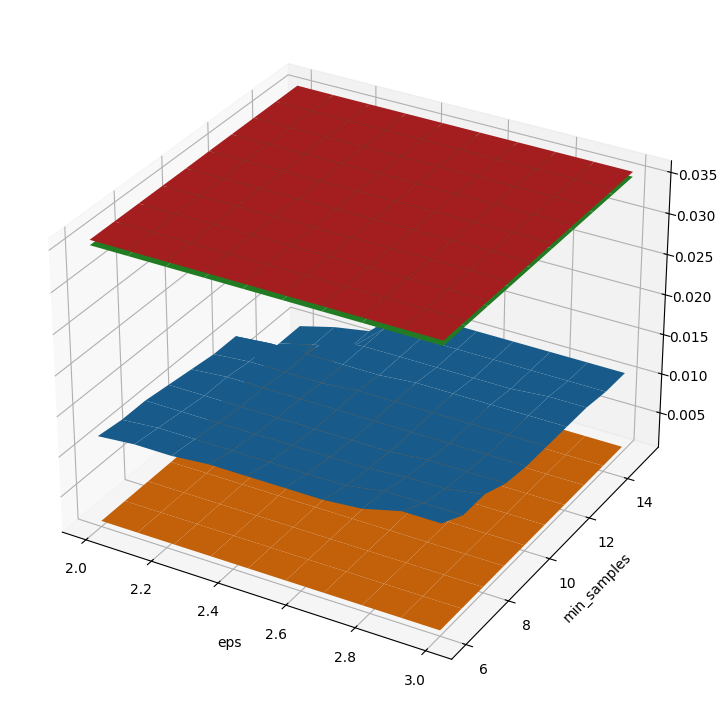

In [6]:
x,y = np.meshgrid(eps_list, min_samples_list)

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(x, y, dbscan_normalized_rand, label = "DBSCAN Normilized Rand")
ax.plot_surface(x, y, dbscan_unnormalized_rand)

ax.plot_surface(x, y, dbscan_normalized_fowlkes)
ax.plot_surface(x, y, dbscan_unnormalized_fowlkes)

ax.set_xlabel('eps')
ax.set_ylabel('min_samples')
 
# show plot
plt.show()


In [27]:

pyplot = lambda x, y, z, color: plt.scatter(x,y, s=(z/np.linalg.norm(z))*300, alpha=0.7, c = color)

Text(0, 0.5, 'min_samples')

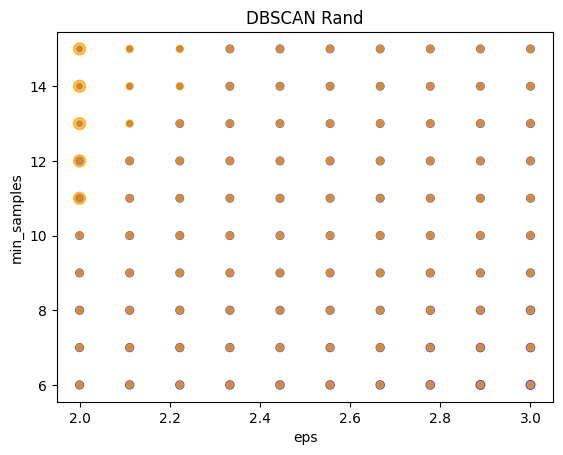

In [31]:
pyplot(x, y, dbscan_normalized_rand, 'blue')
pyplot(x, y, dbscan_unnormalized_rand, 'orange')
plt.title("DBSCAN Rand")
plt.xlabel('eps')
plt.ylabel('min_samples')

Text(0, 0.5, 'min_samples')

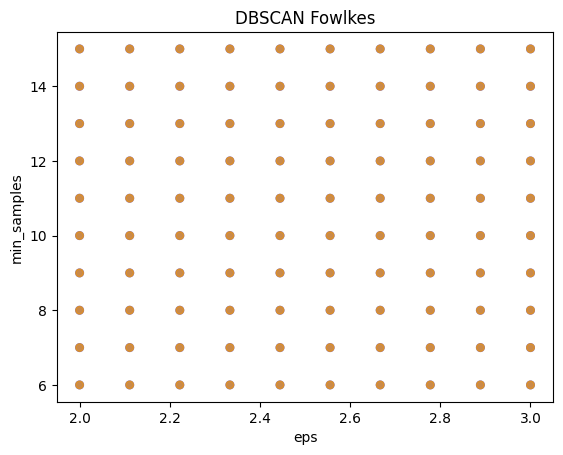

In [32]:
pyplot(x, y, dbscan_normalized_fowlkes, 'blue')
pyplot(x, y, dbscan_unnormalized_fowlkes, 'orange')
plt.title("DBSCAN Fowlkes")
plt.xlabel('eps')
plt.ylabel('min_samples')

#### 4) Кластеризация методом `DBSCAN ` в зависимости от параметра `eps`

In [8]:
# разные параметры окресности eps_list
eps_list = np.linspace(2, 3, 10)

dbscan_eps_unnormalized_rand = []
dbscan_eps_normalized_rand = []

dbscan_eps_unnormalized_fowlkes = []
dbscan_eps_normalized_fowlkes = []

In [9]:
# создание и обучение модели на стандартизированых и исходных данных
for eps in eps_list:
    
    dbscan = DBSCAN(eps=eps)
    predictions = dbscan.fit_predict(X)
    rand = rand_score(california.target[:5000], predictions)
    dbscan_eps_unnormalized_rand.append(rand)
    accuracy_fowlkes = fowlkes_mallows_score(california.target[:5000], predictions)
    dbscan_eps_unnormalized_fowlkes.append(accuracy_fowlkes)
    
    dbscan = DBSCAN(eps=eps)
    predictions = dbscan.fit_predict(X_scaled)
    rand = rand_score(california.target[:5000], predictions)
    dbscan_eps_normalized_rand.append(rand)
    accuracy_fowlkes = fowlkes_mallows_score(california.target[:5000], predictions)
    dbscan_eps_normalized_fowlkes.append(accuracy_fowlkes)

c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\kiril\AppDat

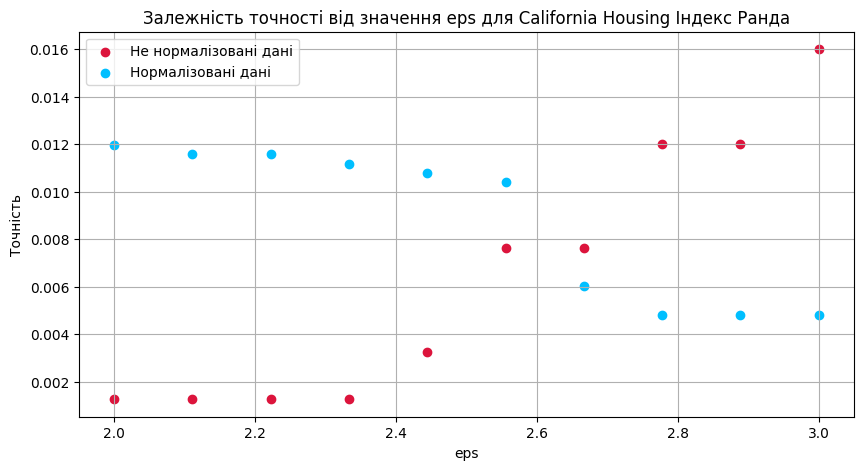

In [27]:
plot_metrics(eps_list, dbscan_eps_unnormalized_rand, dbscan_eps_normalized_rand, 'Залежність точності від значення eps для California Housing Індекс Ранда', 'eps', True)

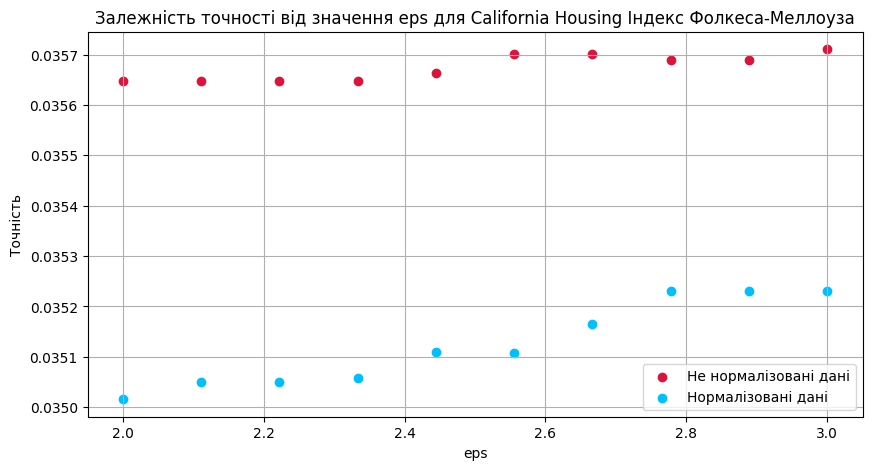

In [26]:
plot_metrics(eps_list, dbscan_eps_unnormalized_fowlkes, dbscan_eps_normalized_fowlkes, 'Залежність точності від значення eps для California Housing Індекс Фолкеса-Меллоуза', 'eps', True)

#### 5) Кластеризация методом `DBSCAN ` в зависимости от параметра `min_samples`

In [10]:
# минимальное количество точек, необходимых для формирования плотного кластера
min_samples_range = range(6, 16)

dbscan_samples_unnormalized_rand = []
dbscan_samples_normalized_rand = []
dbscan_samples_unnormalized_fowlkes = []
dbscan_samples_normalized_fowlkes = []

In [11]:
# создание и обучение модели на стандартизированых и исходных данных
for sample in min_samples_range:
    
    dbscan = DBSCAN(min_samples=sample)
    predictions = dbscan.fit_predict(X)
    rand = rand_score(california.target[:5000], predictions)
    dbscan_samples_unnormalized_rand.append(rand)
    accuracy_fowlkes = fowlkes_mallows_score(california.target[:5000], predictions)
    dbscan_samples_unnormalized_fowlkes.append(accuracy_fowlkes)
    
    dbscan = DBSCAN(min_samples=sample)
    predictions = dbscan.fit_predict(X_scaled)
    rand = rand_score(california.target[:5000], predictions)
    dbscan_samples_normalized_rand.append(rand)
    accuracy_fowlkes = fowlkes_mallows_score(california.target[:5000], predictions)
    dbscan_samples_normalized_fowlkes.append(accuracy_fowlkes)

c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\kiril\AppDat

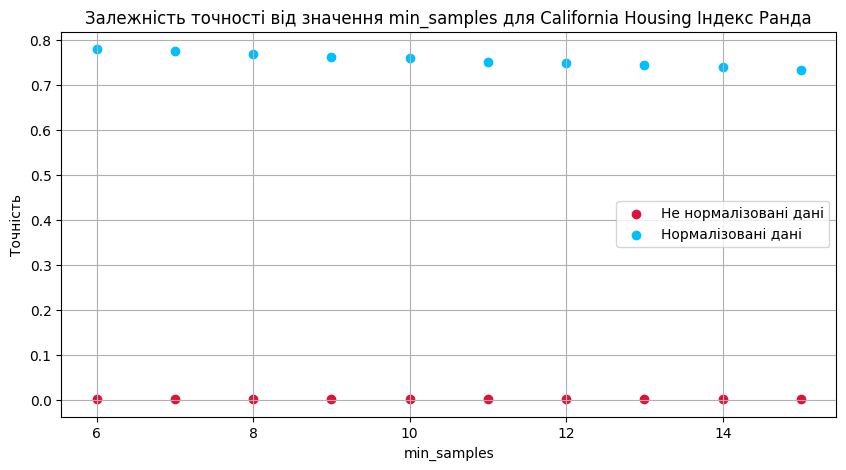

In [30]:
plot_metrics(min_samples_range, dbscan_samples_unnormalized_rand, dbscan_samples_normalized_rand, 'Залежність точності від значення min_samples для California Housing Індекс Ранда', 'min_samples', True)

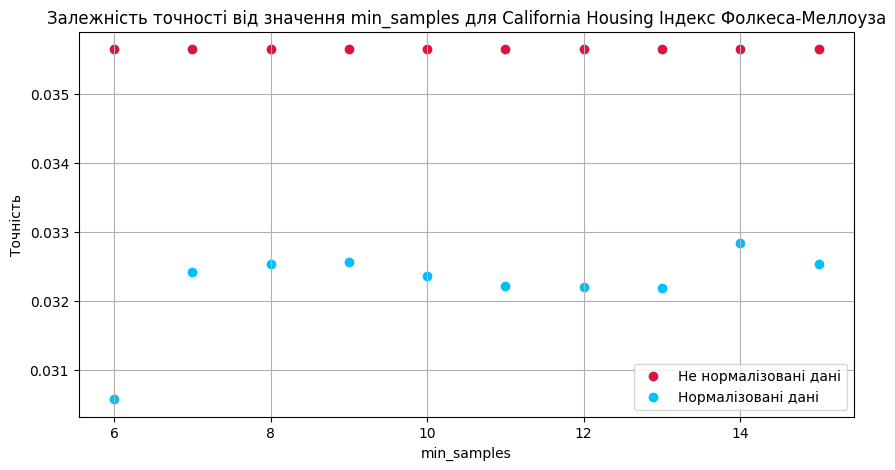

In [31]:
plot_metrics(min_samples_range, dbscan_samples_unnormalized_fowlkes, dbscan_samples_normalized_fowlkes, 'Залежність точності від значення min_samples для California Housing Індекс Фолкеса-Меллоуза', 'min_samples', True)

#### 6) Кластеризация методом `Affinity Propagation` в зависимости от параметра `damping_range`

In [37]:
# контролирует степень изменения доступных кластеров с каждой итерацией
damping_range = np.linspace(0.5, 0.9, 5)

ap_unnormalized_rand = []
ap_normalized_rand = []
ap_unnormalized_fowlkes = []
ap_normalized_fowlkes = []

In [ ]:
for damping in damping_range:
    
    apc = AffinityPropagation(damping=damping)
    predictions = apc.fit_predict(X)
    rand = rand_score(california.target[:5000], predictions)
    ap_unnormalized_rand.append(rand)
    accuracy_fowlkes = fowlkes_mallows_score(california.target[:5000], predictions)
    ap_unnormalized_fowlkes.append(accuracy_fowlkes)
    
    apc = AffinityPropagation(damping=damping)
    predictions = apc.fit_predict(X_scaled)
    rand = rand_score(california.target[:5000], predictions)
    ap_normalized_rand.append(rand)
    accuracy_fowlkes = fowlkes_mallows_score(california.target[:5000], predictions)
    ap_normalized_fowlkes.append(accuracy_fowlkes)

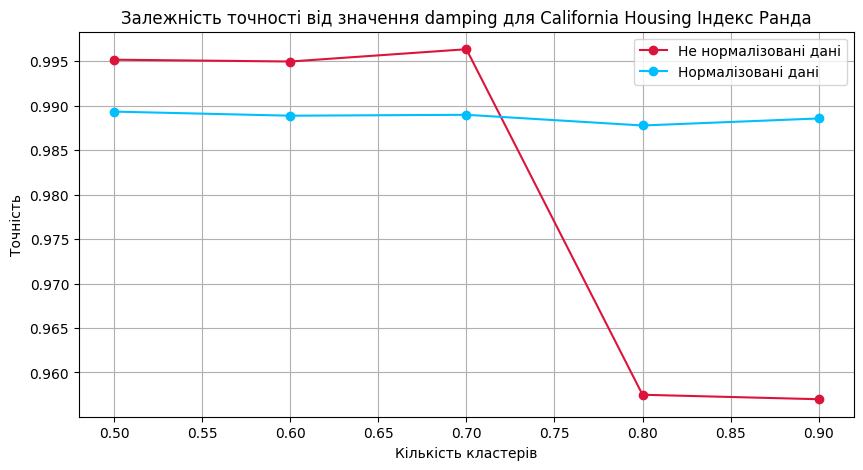

In [55]:
plot_metrics(damping_range, ap_unnormalized_rand, ap_normalized_rand, 'Залежність точності від значення damping для California Housing Індекс Ранда')

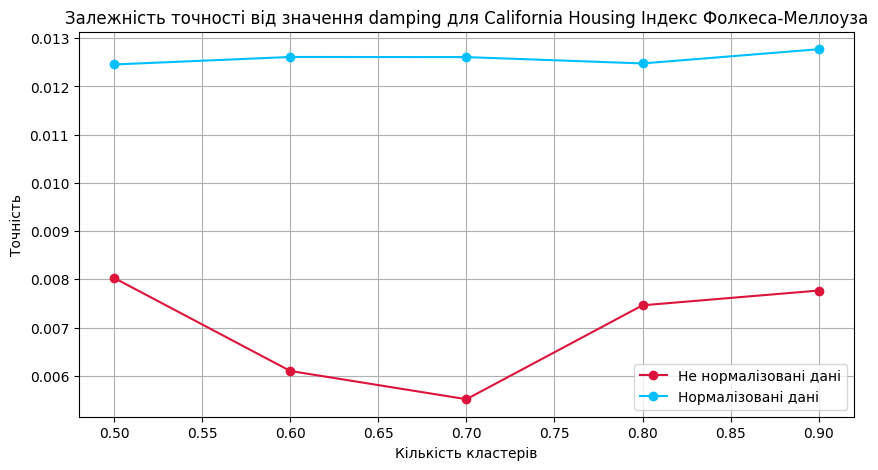

In [54]:
plot_metrics(damping_range, ap_unnormalized_fowlkes, ap_normalized_fowlkes, 'Залежність точності від значення damping для California Housing Індекс Фолкеса-Меллоуза')

#### 7) Построение сравнительной диаграмы алгоритмов кластеризации в зависимости от их максимальных значений на точности для ненормализованных и стандартизированых данных.

In [39]:
# Находим максимальные значения для KMeans
max_kmeans_normalized_rand = np.max(kmeans_accuracy_list_normalized_rand)
max_kmeans_unnormalized_rand = np.max(kmeans_accuracy_list_unnormalized_rand)
max_kmeans_normalized_fowlkes = np.min(kmeans_accuracy_list_normalized_fowlkes)
max_kmeans_unnormalized_fowlkes = np.min(kmeans_accuracy_list_unnormalized_fowlkes)

# Находим максимальные значения для MeanShift
max_meanshift_normalized_rand = np.max(meanshift_accuracy_normalized_rand)
max_meanshift_unnormalized_rand = np.max(meanshift_accuracy_unnormalized_rand)
max_meanshift_normalized_fowlkes = np.min(meanshift_accuracy_normalized_fowlkes)
max_meanshift_unnormalized_fowlkes = np.min(meanshift_accuracy_normalized_fowlkes)

# Находим максимальные значения для DBSCAN (EPC)
max_dbscan_eps_normalized_rand = np.max(dbscan_eps_normalized_rand)
max_dbscan_eps_unnormalized_rand = np.max(dbscan_eps_unnormalized_rand)
max_dbscan_eps_normalized_fowlkes = np.min(dbscan_eps_normalized_fowlkes)
max_dbscan_eps_unnormalized_fowlkes = np.min(dbscan_eps_unnormalized_fowlkes)

# Находим максимальные значения для DBSCAN (min_sample)
max_dbscan_sample_normalized_rand = np.max(dbscan_samples_normalized_rand)
max_dbscan_sample_unnormalized_rand = np.max(dbscan_samples_unnormalized_rand)
max_dbscan_sample_normalized_fowlkes = np.min(dbscan_samples_normalized_fowlkes)
max_dbscan_sample_unnormalized_fowlkes = np.min(dbscan_samples_unnormalized_fowlkes)

# Находим максимальные значения для AffinityPropagation (damping_range)
max_ap_normalized_rand = np.max(ap_normalized_rand)
max_ap_unnormalized_rand = np.max(ap_unnormalized_rand)
max_ap_normalized_fowlkes = np.min(ap_normalized_fowlkes)
max_ap_unnormalized_fowlkes = np.min(ap_unnormalized_fowlkes)

In [40]:
# вспомогательные массиви для отображения данных на диаграме
algorithms = ['KMeans', 'MeanShift', 'DBSCAN (eps)', 'DBSCAN (samples)', 'Affinity Propagation']
metrics = ['Rand', 'Fowlkes-Mallows']
data_types = ['Нормалізовані дані', 'Не нормалізовані дані']

In [41]:
# словарь для красивого вывода лейблов
max_accuracies = {
    'KMeans': {
        'Нормалізовані дані': {
            'Rand': max_kmeans_normalized_rand,
            'Fowlkes-Mallows': max_kmeans_normalized_fowlkes
        },
        'Не нормалізовані дані': {
            'Rand': max_kmeans_unnormalized_rand,
            'Fowlkes-Mallows': max_kmeans_unnormalized_fowlkes
        }
    },
    'MeanShift': {
        'Нормалізовані дані': {
            'Rand': max_meanshift_normalized_rand,
            'Fowlkes-Mallows': max_meanshift_normalized_fowlkes
        },
        'Не нормалізовані дані': {
            'Rand': max_meanshift_unnormalized_rand,
            'Fowlkes-Mallows': max_meanshift_unnormalized_fowlkes
        }
    },
    'DBSCAN (eps)': {
        'Нормалізовані дані': {
            'Rand': max_dbscan_eps_normalized_rand,
            'Fowlkes-Mallows': max_dbscan_eps_normalized_fowlkes
        },
        'Не нормалізовані дані': {
            'Rand': max_dbscan_eps_unnormalized_rand,
            'Fowlkes-Mallows': max_dbscan_eps_unnormalized_fowlkes
        }
    },
    'DBSCAN (samples)': {
        'Нормалізовані дані': {
            'Rand': max_dbscan_sample_normalized_rand,
            'Fowlkes-Mallows': max_dbscan_sample_normalized_fowlkes
        },
        'Не нормалізовані дані': {
            'Rand': max_dbscan_sample_unnormalized_rand,
            'Fowlkes-Mallows': max_dbscan_sample_unnormalized_fowlkes
        }
    },
    'Affinity Propagation': {
        'Нормалізовані дані': {
            'Rand': max_ap_normalized_rand,
            'Fowlkes-Mallows': max_ap_normalized_fowlkes
        },
        'Не нормалізовані дані': {
            'Rand': max_ap_unnormalized_rand,
            'Fowlkes-Mallows': max_ap_unnormalized_fowlkes
        }
    }
}

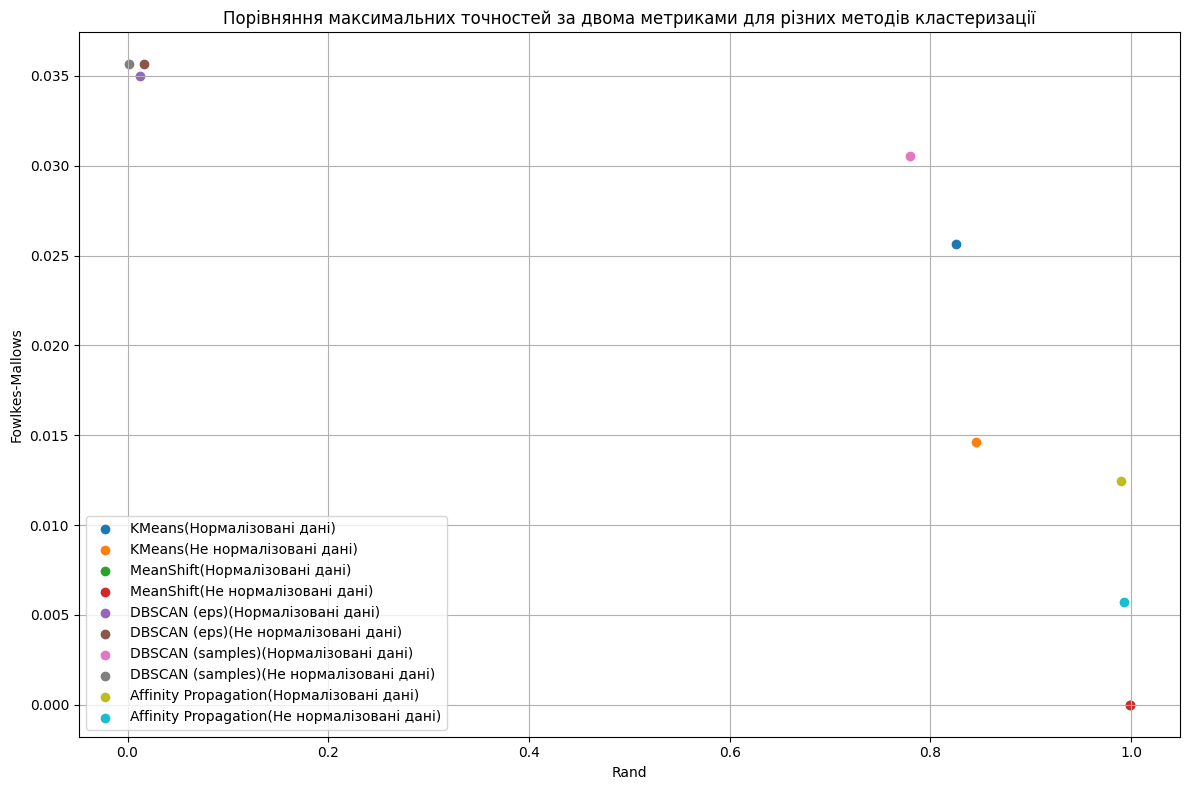

In [43]:
# вывод диаграммы
plt.figure(figsize=(12, 8))
for algorithm in algorithms:
    for data_type in data_types:
        x_values = [max_accuracies[algorithm][data_type][metric] for metric in metrics]
        plt.scatter(x_values[0], x_values[1], label=f'{algorithm}({data_type})', marker='o')
        
plt.xlabel(metrics[0])
plt.ylabel(metrics[1])
plt.title('Порівняння максимальних точностей за двома метриками для різних методів кластеризації')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 6) Вивід точностей:

In [46]:
# Вывод результатов точности для DBSCAN eps (индекс Рэнда) 
for i, j in zip(eps_list, range(len(dbscan_eps_unnormalized_rand))):
    print(f'{i:.5f} | {dbscan_eps_unnormalized_rand[j]:.5f} | {dbscan_eps_normalized_rand[j]:.5f}')

2.00000 | 0.00127 | 0.01197
2.11111 | 0.00127 | 0.01157
2.22222 | 0.00127 | 0.01158
2.33333 | 0.00127 | 0.01118
2.44444 | 0.00327 | 0.01079
2.55556 | 0.00765 | 0.01039
2.66667 | 0.00765 | 0.00602
2.77778 | 0.01203 | 0.00483
2.88889 | 0.01203 | 0.00483
3.00000 | 0.01600 | 0.00483


In [47]:
# Вывод результатов точности для DBSCAN eps (индекс Фолкеса-Меллоуза) 
for i, j in zip(eps_list, range(len(dbscan_eps_unnormalized_fowlkes))):
    print(f'{i:.5f} | {dbscan_eps_unnormalized_fowlkes[j]:.5f} | {dbscan_eps_normalized_fowlkes[j]:.5f}')

2.00000 | 0.03565 | 0.03502
2.11111 | 0.03565 | 0.03505
2.22222 | 0.03565 | 0.03505
2.33333 | 0.03565 | 0.03506
2.44444 | 0.03566 | 0.03511
2.55556 | 0.03570 | 0.03511
2.66667 | 0.03570 | 0.03516
2.77778 | 0.03569 | 0.03523
2.88889 | 0.03569 | 0.03523
3.00000 | 0.03571 | 0.03523


In [49]:
# Вывод результатов точности для DBSCAN min_samples (индекс Рэнда) 
for i, j in zip(min_samples_range, range(len(dbscan_samples_unnormalized_rand))):
    print(f'{i} | {dbscan_samples_unnormalized_rand[j]:.5f} | {dbscan_samples_normalized_rand[j]:.5f}')

6 | 0.00127 | 0.77970
7 | 0.00127 | 0.77475
8 | 0.00127 | 0.76906
9 | 0.00127 | 0.76230
10 | 0.00127 | 0.75976
11 | 0.00127 | 0.75198
12 | 0.00127 | 0.74896
13 | 0.00127 | 0.74376
14 | 0.00127 | 0.74032
15 | 0.00127 | 0.73355


In [50]:
# Вывод результатов точности для DBSCAN min_samples (индекс Фолкеса-Меллоуза) 
for i, j in zip(min_samples_range, range(len(dbscan_samples_unnormalized_fowlkes))):
    print(f'{i} | {dbscan_samples_unnormalized_fowlkes[j]:.5f} | {dbscan_samples_normalized_fowlkes[j]:.5f}')

6 | 0.03565 | 0.03057
7 | 0.03565 | 0.03241
8 | 0.03565 | 0.03253
9 | 0.03565 | 0.03256
10 | 0.03565 | 0.03236
11 | 0.03565 | 0.03221
12 | 0.03565 | 0.03220
13 | 0.03565 | 0.03219
14 | 0.03565 | 0.03284
15 | 0.03565 | 0.03253


In [58]:
# Вывод результатов точности для Affinity Propagation damping (индекс Рэнда) 
for i, j in zip(damping_range, range(len(ap_unnormalized_rand))):
    print(f'{i:.1f} | {ap_unnormalized_rand[j]:.5f} | {ap_normalized_rand[j]:.5f}')

0.5 | 0.99518 | 0.98935
0.6 | 0.99498 | 0.98888
0.7 | 0.99636 | 0.98899
0.8 | 0.95749 | 0.98778
0.9 | 0.95699 | 0.98857


In [59]:
# Вывод результатов точности для Affinity Propagation damping (индекс Фолкеса-Меллоуза) 
for i, j in zip(damping_range, range(len(ap_unnormalized_fowlkes))):
    print(f'{i:.1f} | {ap_unnormalized_fowlkes[j]:.5f} | {ap_normalized_fowlkes[j]:.5f}')

0.5 | 0.00803 | 0.01246
0.6 | 0.00610 | 0.01261
0.7 | 0.00551 | 0.01261
0.8 | 0.00746 | 0.01248
0.9 | 0.00777 | 0.01277
